== 事前準備： ライブラリのインポートとデータの読み込み

In [82]:
import os
import numpy as np
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)
# print all downloaded files to check if they are there
excel_dir = "../../../src/downloads/"
# place to save output csv files
output_dir = "../../../data/特許数/"
os.makedirs(output_dir, exist_ok=True)

print(os.listdir(excel_dir))

['第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2017_1747118972.xls', '第7表 産業別、企業数、事業所数、従業者数、部門別売上高、営業費用、営業利益、直接輸出額、直接輸入額、総資産額、子会社・関連会社の保有社数_2004_1747119356.xls', '第12表 産業別、企業数、技術取引の受取金額_2013_1747119068.xls', '第7表 産業別、親会社業種別、議決権所有割合別、国内・海外別社数_2022_1747118875.xls', '第1表 産業別、企業数、事業所数、従業者数、資産、負債及び純資産、売上高、売上総利益、営業費用、営業利益、経常利益、当期純利益、付加価値額、子会社・関連会社数_2019_1747118927.xls', '第2表 産業別、従業者規模別、資本金規模別、企業数、総資産、売上高、付加価値額_2011_1747119120.xls', '2 産業別、売上高経常利益率別売上高_2009_1747119208.xls', '4 産業別、損益計算書の消費税扱い、決算期別企業数_2017_1747118976.xls', '第6表 産業別、企業数、事業所数、従業者数、部門別売上高、営業費用、営業利益、直接輸出額、直接輸入額、総資産、子会社・関連会社の保有社数_2006_1747119282.xls', '第3表 産業別、事業活動別、企業数、売上高_2017_1747118977.xls', '2 産業別、売上高経常利益率別売上高_2005_1747119308.xls', '第7表 産業別、親会社業種別、議決権所有割合別、国内・海外別社数_2011_1747119153.xls', '第11表 産業別、製造委託以外の委託分野別、国内・海外別企業数及び業務委託金額_2021_1747118893.xls', '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2016_1747118989.xls', '10 産業別、企業数、取締役の人数、委員会設置会社の状況、ストックオプション制度の実施状況_2013_1747119076.xls', '第8表 産業別、親会社業種別、親会社の経営形態別、連結対象関係別の企業

今回、「産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数」で始まるファイルだけをクリーンアップする。

In [59]:
filepaths = [fp for fp in os.listdir(excel_dir) if "産業別、企業数、特許権、実用新案権、意匠権別" in fp]
filepaths

['第10表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2009_1747119200.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2019_1747118932.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2022_1747118861.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2018_1747118952.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2011_1747119126.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2020_1747118907.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2014_1747119038.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2017_1747118973.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2016_1747118989.xls',
 '第10表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2007_1747119241.xls',
 '第12表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2004_1747119340.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2015_1747119016.xls',
 '第9表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2006_1747119265.xls',
 '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2021_1747118881.xls',
 '第12表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2003_1747119379.xls',
 '第10表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2008_1747119223

フォマットが揃っていないので、細かいところ年ごとに対応の必要がある

年分は各ファイルの"_"で挟んだ部分

In [60]:
year_to_filepath = {}
for filepath in filepaths:
    # 年分を取得
    year = int(filepath.split("_")[1])
    # 年分：pathの辞書を作成
    year_to_filepath[year] = filepath
    print(year)
print(year_to_filepath)

2009
2019
2022
2018
2011
2020
2014
2017
2016
2007
2004
2015
2006
2021
2003
2008
2023
2010
2012
2013
2005
{2009: '第10表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2009_1747119200.xls', 2019: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2019_1747118932.xls', 2022: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2022_1747118861.xls', 2018: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2018_1747118952.xls', 2011: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2011_1747119126.xls', 2020: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2020_1747118907.xls', 2014: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2014_1747119038.xls', 2017: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2017_1747118973.xls', 2016: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2016_1747118989.xls', 2007: '第10表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2007_1747119241.xls', 2004: '第12表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2004_1747119340.xls', 2015: '第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2015_1747119016.xls', 2006: '第9表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数_2006_1747119265.xls', 2021: '第11表

## Try with one table first
== エクセルからpandas dfの関数を作りたい、まず2010のデータで試す

In [61]:
# pathを取得
filepath = year_to_filepath[2010]
df = pd.read_excel(os.path.join(excel_dir, filepath), header=1)
df

,Unnamed: 0,第１１表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,特許権,NaN,NaN,NaN,実用新案権,NaN,NaN,NaN,意匠権,NaN,NaN,NaN
1,NaN,NaN,企業数,件数,NaN,NaN,企業数,件数,NaN,NaN,企業数,件数,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,所有数,使用のもの（含供与）,NaN,NaN,所有数,使用のもの（含供与）,NaN,NaN,所有数,使用のもの（含供与）,NaN
4,NaN,NaN,NaN,NaN,件,うち自社開発,NaN,NaN,件,うち自社開発,NaN,NaN,件,うち自社開発
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,927 ディスプレイ業,2,X,X,X,2,X,X,X,3,10,10,10
161,NaN,928 テレマーケティング業,1,X,X,-,-,-,-,-,-,-,-,-
162,NaN,929 その他の事業サービス業,30,259,230,X,8,17,10,7,10,X,X,X
163,NaN,サービス業（その他のサービス業）,46,1028,470,448,18,74,37,30,28,194,137,127


== 第0列と第0~3行はいらないと分かったので、消します (表の名前だけなので)

In [62]:
# Remove the 0th column
df = df.drop(columns=df.columns[0])
df

,第１１表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,特許権,NaN,NaN,NaN,実用新案権,NaN,NaN,NaN,意匠権,NaN,NaN,NaN
1,NaN,企業数,件数,NaN,NaN,企業数,件数,NaN,NaN,企業数,件数,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,所有数,使用のもの（含供与）,NaN,NaN,所有数,使用のもの（含供与）,NaN,NaN,所有数,使用のもの（含供与）,NaN
4,NaN,NaN,NaN,件,うち自社開発,NaN,NaN,件,うち自社開発,NaN,NaN,件,うち自社開発
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,927 ディスプレイ業,2,X,X,X,2,X,X,X,3,10,10,10
161,928 テレマーケティング業,1,X,X,-,-,-,-,-,-,-,-,-
162,929 その他の事業サービス業,30,259,230,X,8,17,10,7,10,X,X,X
163,サービス業（その他のサービス業）,46,1028,470,448,18,74,37,30,28,194,137,127


== 元のExcelファイルには結合されたセルがあるため、それらの結合セルの要素を右側にコピーすることで対応します。

In [63]:
# Remove all whitespaces from the dataframe
df.replace(to_replace=r'\s+', value='', regex=True, inplace=True)
df2 = df.copy()
# 結合されたセルとコピーが必要な回数
merged_headers = {
    "特許権": 3,
    "実用新案権": 3,
    "意匠権": 3,
    "件数": 2,
    "使用のもの（含供与）": 1
}
# Handle merged cells based on merged_headers
for key, value in merged_headers.items():
    # 6行目まではヘッダー行
    for row in range(6):
        if key in df2.iloc[row].values:
            # 結合された行を取得
            col_index = df2.iloc[row].tolist().index(key)
            for i in range(value):
                # 結合されたセルの右側の列に値をコピー
                # 右側の列が空であれば値をコピー
                if pd.isna(df2.iloc[row, col_index + i + 1]):
                    df2.iloc[row, col_index + i + 1] = key
            break
            
df2.head()

,第１１表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,特許権,特許権,特許権,特許権,実用新案権,実用新案権,実用新案権,実用新案権,意匠権,意匠権,意匠権,意匠権
1,NaN,企業数,件数,件数,件数,企業数,件数,NaN,NaN,企業数,件数,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,所有数,使用のもの（含供与）,使用のもの（含供与）,NaN,所有数,使用のもの（含供与）,NaN,NaN,所有数,使用のもの（含供与）,NaN
4,NaN,NaN,NaN,件,うち自社開発,NaN,NaN,件,うち自社開発,NaN,NaN,件,うち自社開発


== 最初の5行を結合してヘッダーを作成します。最初の列に欠けていた「産業」を追加しました。

In [64]:
df2.iloc[0,0] = "産業"
# Process the first five rows to create a single header row
header_rows = df2.iloc[:5].fillna('').astype(str)
header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').rstrip('_'), axis=0)

# Update the dataframe with the new header
df2.columns = header
df2 = df2.iloc[5:].reset_index(drop=True)

df2.head()

,産業,特許権_企業数,特許権_件数_所有数,特許権_件数_使用のもの（含供与）_件,特許権_件数_使用のもの（含供与）_うち自社開発,実用新案権_企業数,実用新案権_件数_所有数,実用新案権__使用のもの（含供与）_件,実用新案権__うち自社開発,意匠権_企業数,意匠権_件数_所有数,意匠権__使用のもの（含供与）_件,意匠権__うち自社開発
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,平成17年度,5739,991731,382741,320182,3344,45041,23356,21631,3390,225439,95879,88332
2,平成18年度,5805,1074751,415094,373599,3097,30891,17729,16844,3337,264879,98118,94117
3,平成19年度,5456,1045942,402136,380626,2565,22980,13665,13157,3124,253599,99040,96321
4,平成20年度,6181,1188879,448896,412040,2399,19050,11085,10293,3432,241538,97775,92978


== 過去の年度のデータである最初の5行を削除します。これらの年度については、後でより情報量の多い表を作成します。

In [65]:
df2 = df2.iloc[6:].reset_index(drop=True)
df2.head()

,産業,特許権_企業数,特許権_件数_所有数,特許権_件数_使用のもの（含供与）_件,特許権_件数_使用のもの（含供与）_うち自社開発,実用新案権_企業数,実用新案権_件数_所有数,実用新案権__使用のもの（含供与）_件,実用新案権__うち自社開発,意匠権_企業数,意匠権_件数_所有数,意匠権__使用のもの（含供与）_件,意匠権__うち自社開発
0,総合計,6464,1222900,454571,414236,2370,18051,10003,9271,3604,229878,90908,86405
1,合計,6287,1213245,451976,411845,2308,16783,9862,9144,3517,228727,90520,86065
2,鉱業、採石業、砂利採取業,7,115,20,14,1,X,X,X,-,-,-,-
3,製造業,4894,1119357,408012,371091,1803,14317,8282,7754,2638,210123,78777,75304
4,090食料品製造業,280,9379,3613,3263,58,204,161,148,157,1722,1215,1043


== すべての「X」と「-」をNaNに置き換えます。

== これで2010のクリーニング、完成

In [66]:
df2.replace({'X': np.nan, '-': np.nan}, inplace=True)
df2

,産業,特許権_企業数,特許権_件数_所有数,特許権_件数_使用のもの（含供与）_件,特許権_件数_使用のもの（含供与）_うち自社開発,実用新案権_企業数,実用新案権_件数_所有数,実用新案権__使用のもの（含供与）_件,実用新案権__うち自社開発,意匠権_企業数,意匠権_件数_所有数,意匠権__使用のもの（含供与）_件,意匠権__うち自社開発
0,総合計,6464,1222900,454571,414236,2370,18051,10003,9271,3604,229878,90908,86405
1,合計,6287,1213245,451976,411845,2308,16783,9862,9144,3517,228727,90520,86065
2,鉱業、採石業、砂利採取業,7,115,20,14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,製造業,4894,1119357,408012,371091,1803,14317,8282,7754,2638,210123,78777,75304
4,090食料品製造業,280,9379,3613,3263,58,204,161,148,157,1722,1215,1043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,927ディスプレイ業,2,NaN,NaN,NaN,2,NaN,NaN,NaN,3,10,10,10
150,928テレマーケティング業,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,929その他の事業サービス業,30,259,230,NaN,8,17,10,7,10,NaN,NaN,NaN
152,サービス業（その他のサービス業）,46,1028,470,448,18,74,37,30,28,194,137,127


## Make into function for all excel files
== すべての年に対応する単一の関数に、上記の作業をまとめたい

In [67]:
def excel_to_dataframe(filename):
    df = pd.read_excel(os.path.join(excel_dir, filename), header=1)
    # remove column 0
    df = df.drop(columns=df.columns[0])
    
    # Remove all whitespaces from the dataframe
    df.replace(to_replace=r'\s+', value='', regex=True, inplace=True)
    df = df.copy()
    # 結合されたセルとコピーが必要な回数
    merged_headers = {
    "特許権": 3,
    "実用新案権": 3,
    "意匠権": 3,
    "件数": 2,
    "使用のもの（含供与）": 1
}
    # Handle merged cells based on merged_headers
    for key, value in merged_headers.items():
        # 6行目まではヘッダー行
        for row in range(6):
            if key in df.iloc[row].values:
                # 結合された行を取得
                col_index = df.iloc[row].tolist().index(key)
                for i in range(value):
                    # 結合されたセルの右側の列に値をコピー
                    # 右側の列が空であれば値をコピー
                    if pd.isna(df.iloc[row, col_index + i + 1]):
                        df.iloc[row, col_index + i + 1] = key
                break
    
    df.iloc[0,0] = "産業"
    # Process the first five rows to create a single header row
    header_rows = df.iloc[:5].fillna('').astype(str)
    header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').rstrip('_'), axis=0)

    # Update the dataframe with the new header
    df.columns = header
    df = df.iloc[5:].reset_index(drop=True)

    df = df.iloc[6:].reset_index(drop=True)
    df.replace({'X': np.nan, 'x': np.nan, '-': np.nan}, inplace=True)
    return df    

In [68]:
# 2010年のデータで確認
df_2010 = excel_to_dataframe(year_to_filepath[2010])
df_2010

,産業,特許権_企業数,特許権_件数_所有数,特許権_件数_使用のもの（含供与）_件,特許権_件数_使用のもの（含供与）_うち自社開発,実用新案権_企業数,実用新案権_件数_所有数,実用新案権__使用のもの（含供与）_件,実用新案権__うち自社開発,意匠権_企業数,意匠権_件数_所有数,意匠権__使用のもの（含供与）_件,意匠権__うち自社開発
0,総合計,6464,1222900,454571,414236,2370,18051,10003,9271,3604,229878,90908,86405
1,合計,6287,1213245,451976,411845,2308,16783,9862,9144,3517,228727,90520,86065
2,鉱業、採石業、砂利採取業,7,115,20,14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,製造業,4894,1119357,408012,371091,1803,14317,8282,7754,2638,210123,78777,75304
4,090食料品製造業,280,9379,3613,3263,58,204,161,148,157,1722,1215,1043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,927ディスプレイ業,2,NaN,NaN,NaN,2,NaN,NaN,NaN,3,10,10,10
150,928テレマーケティング業,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,929その他の事業サービス業,30,259,230,NaN,8,17,10,7,10,NaN,NaN,NaN
152,サービス業（その他のサービス業）,46,1028,470,448,18,74,37,30,28,194,137,127


== すべてのExcelファイルに関数を使う

In [69]:
for year, filepath in year_to_filepath.items():
    df = excel_to_dataframe(filepath)
    # Save the dataframe to a CSV file
    csv_filename = f"research_funding_{year}.csv"
    df.to_csv(os.path.join(output_dir, csv_filename), index=False, encoding='utf-8-sig')

== 2010以外csv出力結果がおかしいので、確認したらフォーマットが異なるからうまく動作していない

== 年毎の調整を入れる:

== 見比べの結果
1. 

In [129]:
def excel_to_dataframe2(filename, year):
    df = pd.read_excel(os.path.join(excel_dir, filename), header=1)
    # Remove all whitespaces from the dataframe
    df.replace(to_replace=r'\s+', value='', regex=True, inplace=True)
    df = df.copy()
    # 結合されたセルとコピーが必要な回数
    merged_headers = {
        "特許権": 3,
        "実用新案権": 3,
        "意匠権": 3,
        "件数": 2,
        "使用のもの（含供与）": 1
    }
    
    if year < 2011 or year > 2013:
        # remove column 0
        df = df.drop(columns=df.columns[0])
    if year >= 2014:
        df = df.iloc[2:].reset_index(drop=True)
    
    # Remove all whitespaces from the dataframe
    df.replace(to_replace=r'\s+', value='', regex=True, inplace=True)
    
    # Handle merged cells based on merged_headers
    for key, value in merged_headers.items():
        # 6行目まではヘッダー行
        for row in range(6):
            if key in df.iloc[row].values:
                # 結合された行を取得
                col_index = df.iloc[row].tolist().index(key)
                for i in range(value):
                    # 結合されたセルの右側の列に値をコピー
                    # 右側の列が空であれば値をコピー
                    if pd.isna(df.iloc[row, col_index + i + 1]):
                        df.iloc[row, col_index + i + 1] = key
                break
    
    # Process the first five rows to create a single header row
    df.iloc[0,0] = "産業"
    header_rows = df.iloc[:6].fillna('').astype(str)
    header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').rstrip('_'), axis=0)

    # Update the dataframe with the new header
    df.columns = header
    df = df.iloc[5:].reset_index(drop=True)

    df = df.iloc[6:].reset_index(drop=True)
    df.replace({'X': np.nan, 'x': np.nan,'Ｘ': np.nan, 'ｘ':np.nan, '***':np.nan, '-': np.nan}, inplace=True)
    return df   

# 2020年以降のデータ
def excel_to_dataframe3(filename, year):
    df = pd.read_excel(os.path.join(excel_dir, filename), header=0)
    # Drop all empty columns
    df = df.dropna(axis=1, how='all')
    # drop columns 0, 1, 3
    df = df.drop(columns=[df.columns[0], df.columns[2], df.columns[3]])
    df.iloc[0,0] = "産業"
    header_rows = df.iloc[:6].fillna('').astype(str)
    header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').replace('__', '_').rstrip('_'), axis=0)
    header = header.str.replace('特許権_件数_所有数_件', '特許権_件数_所有数', regex=True)

    df.columns = header
    df = df.iloc[5:].reset_index(drop=True)
    df = df.iloc[7:].reset_index(drop=True)
    df.replace({'X': np.nan, 'x': np.nan,'Ｘ': np.nan,'ｘ':np.nan, '***':np.nan, '-': np.nan}, inplace=True)
    return df  


== 実行&CSVファイルに保存する

In [130]:
# make df dictionary
df_dict = {}
for year, filepath in year_to_filepath.items():
    if year >= 2020:
        df = excel_to_dataframe3(filepath, year)
    else:
        # Use the original function for years before 2020
        df = excel_to_dataframe2(filepath, year)
    # Save the dataframe to a CSV file
    csv_filename = f"patent_{year}.csv"
    df.to_csv(os.path.join(output_dir, csv_filename), index=False, encoding='utf-8-sig')
    df_dict[year] = df
df_dict

{2009:                    産業 特許権_企業数 特許権_件数_所有数 特許権_件数_使用のもの（含供与）_件  \
 0                 総合計    6181    1188879              448896   
 1                  合計    6019    1179252              446150   
 2        鉱業、採石業、砂利採取業       7        114                  20   
 3                 製造業    4768    1093599              419914   
 4           090食料品製造業     261      11273                5171   
 ..                ...     ...        ...                 ...   
 150         912労働者派遣業      11        NaN                 NaN   
 151        927ディスプレイ業       2        NaN                 NaN   
 152    929その他の事業サービス業      21       1135                 808   
 153  サービス業（その他のサービス業）      37        739                 378   
 154            その他の産業     125       8888                2368   
 
     特許権_件数_使用のもの（含供与）_うち自社開発 実用新案権_企業数 実用新案権_件数_所有数 実用新案権__使用のもの（含供与）_件  \
 0                     412040      2399        19050               11085   
 1                     409643      2336        17794        

## Visualization

### 1. Simple Bar charts

0      1811356
1      1721671
2          551
3      1456612
4        13056
        ...   
155         18
156         30
157        744
158      76682
159      13003
Name: 特許権_件数_所有数, Length: 160, dtype: object


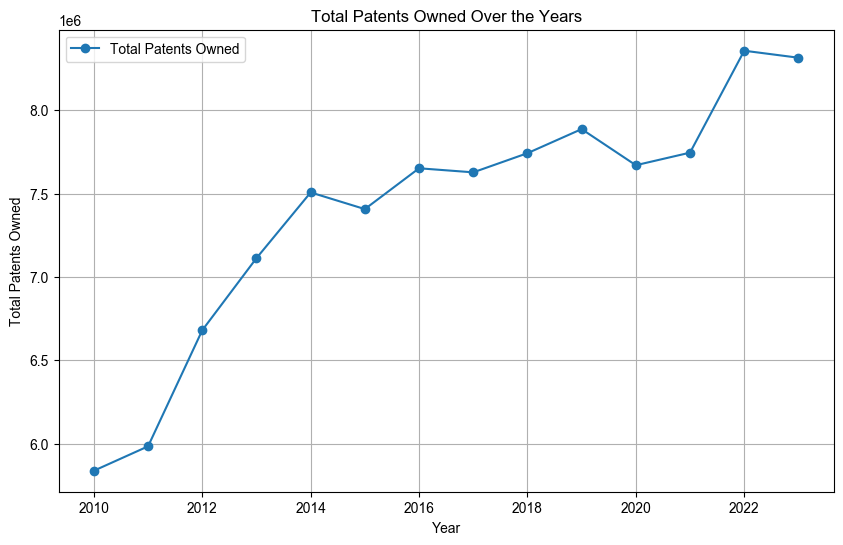

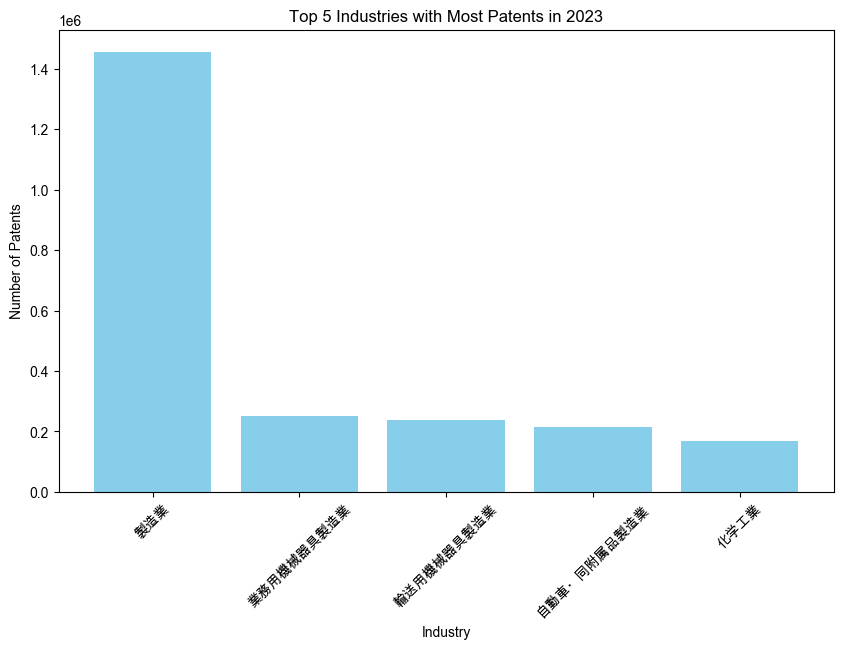

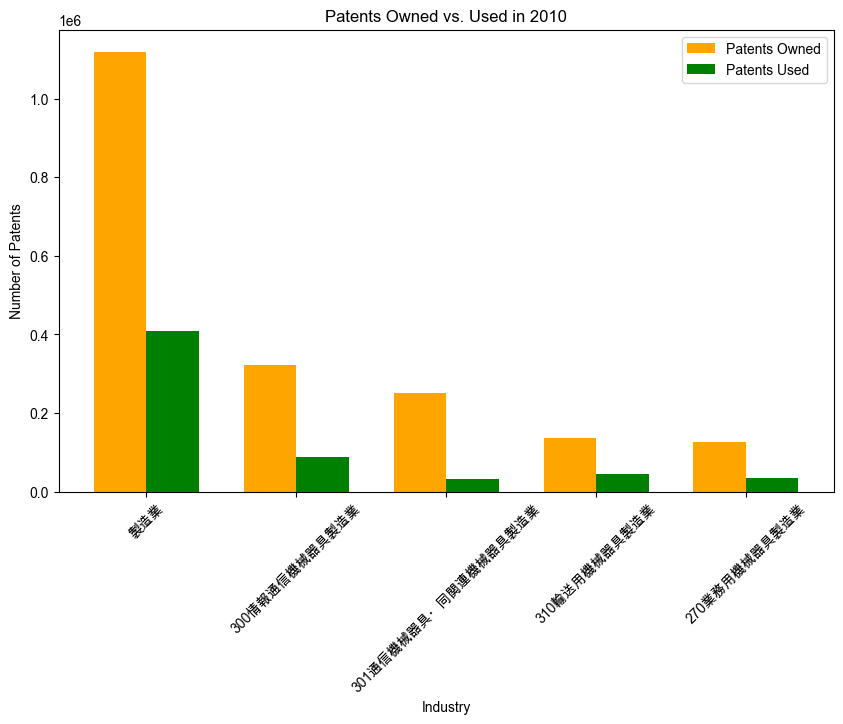

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
# 自分のパソコンにインストールされている日本語フォントを指定してください
# For MacOS
fp = FontProperties(fname = '/Library/Fonts/Arial Unicode.ttf',size = 11)
plt.rc('font', family=fp.get_name())

# Plot 1: Total patents owned over the years
years = sorted(df_dict.keys())
years = [year for year in years if year >= 2010]  # Filter years from 2010 onwards
total_patents = [df_dict[year]['特許権_件数_所有数'].dropna().astype(int).sum() for year in years]

print(df_dict[2023]['特許権_件数_所有数'])
plt.figure(figsize=(10, 6))
plt.plot(years, total_patents, marker='o', label='Total Patents Owned')
plt.title('Total Patents Owned Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Patents Owned')
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: Top 5 industries with the most patents in the latest year
latest_year = max(years)
latest_df = df_dict[latest_year].iloc[2:]
top_industries = latest_df[['産業', '特許権_件数_所有数']].dropna()
top_industries['特許権_件数_所有数'] = top_industries['特許権_件数_所有数'].astype(int)
top_industries = top_industries.sort_values(by='特許権_件数_所有数', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_industries['産業'], top_industries['特許権_件数_所有数'], color='skyblue')
plt.title(f'Top 5 Industries with Most Patents in {latest_year}')
plt.xlabel('Industry')
plt.ylabel('Number of Patents')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Comparison of patents owned vs. used for a specific year
specific_year = 2010
specific_df = df_dict[specific_year].iloc[2:]
specific_df = specific_df[['産業', '特許権_件数_所有数', '特許権_件数_使用のもの（含供与）_件']].dropna()
specific_df['特許権_件数_所有数'] = specific_df['特許権_件数_所有数'].astype(int)
specific_df['特許権_件数_使用のもの（含供与）_件'] = specific_df['特許権_件数_使用のもの（含供与）_件'].astype(int)
specific_df = specific_df.sort_values(by='特許権_件数_所有数', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(specific_df))
plt.bar(x, specific_df['特許権_件数_所有数'], width=bar_width, label='Patents Owned', color='orange')
plt.bar([p + bar_width for p in x], specific_df['特許権_件数_使用のもの（含供与）_件'], width=bar_width, label='Patents Used', color='green')
plt.xticks([p + bar_width / 2 for p in x], specific_df['産業'], rotation=45)
plt.title(f'Patents Owned vs. Used in {specific_year}')
plt.xlabel('Industry')
plt.ylabel('Number of Patents')
plt.legend()
plt.show()

### 2. (TODO)